In [1]:
import pandas as pd

In [44]:
sheet_list = ["20table_명세서일반내역",
                  "30table_진료내역",
                  "40table_상병",
                  "53table_처방전상세내역"]

for i in range (len(sheet_list)):
    file_path = './files_new2/df_kor_{}.xlsx'.format(sheet_list[i])
    globals()['df{}'.format(i)] = pd.read_excel(file_path, index_col=0)

In [45]:
df = df0.copy()

In [27]:
df2 = df2.reset_index()

In [28]:
DGSBJT_CD = pd.read_csv('./files_new2/DGSBJT_CD.csv')
DGSBJT_CD
DGSBJT_CD = DGSBJT_CD.astype('str')
DGSBJT_CD['상병진료과목코드'] = DGSBJT_CD['상병진료과목코드'].str.zfill(2)

In [29]:
df_2_CD = pd.merge(df2, DGSBJT_CD, how='left', on='상병진료과목코드')

In [74]:
df_2_CD=df_2_CD[~df_2_CD['명세서 연결코드'].duplicated(keep='first')]
df_2_CD

,명세서 연결코드,상병일련번호,상병진료과목코드,청구상병기호,청구진료과목코드,진료과목
0,1,3,01,K599,1,내과
4,2,1,01,I109,1,내과
6,3,1,03,F849,3,정신과
7,4,1,54,K0538,54,치주과
8,5,2,05,M130,5,정형외과
...,...,...,...,...,...,...
15582,5627,1,56,K121,56,구강내과
15583,5628,3,01,Z511,1,내과
15587,5629,4,13,H66000,13,이비인후과
15591,5630,5,01,K291,1,내과


In [48]:
df = df.reset_index()
df

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호
0,1,169,3,0,3,13,0.030001,33.332599,62,1,...,1,9430,2800,6630,0,$,$,$,$,30796
1,2,183,3,0,8,15,0.030000,33.332882,74,2,...,1,4380,500,3880,0,$,$,$,$,9795
2,3,23,3,0,3,3,0.030000,33.332920,14,1,...,1,3310,1300,2010,0,$,$,$,$,34835
3,4,96,3,0,5,14,0.030000,33.333002,68,1,...,1,26660,7900,18760,0,$,$,$,$,35538
4,5,28,3,0,3,4,0.030001,33.332721,19,1,...,1,9430,2800,6630,0,$,$,$,$,4665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9,2,...,1,13310,3900,9410,0,$,$,$,$,21762
5627,5628,295,3,0,3,4,0.030001,33.332721,20,1,...,1,71310,3500,67810,0,V193,$,$,$,45362
5628,5629,246,3,0,3,1,0.030000,33.333050,4,1,...,1,13820,2900,10920,0,$,$,$,$,12083
5629,5630,253,3,0,3,10,0.030000,33.332913,47,2,...,1,9430,2800,6630,0,$,$,$,$,21067


In [85]:
mdf=pd.merge(df, df_2_CD, left_on = '명세서 연결코드', right_on = '명세서 연결코드', how = 'inner')
mdf

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,상병일련번호,상병진료과목코드,청구상병기호,청구진료과목코드,진료과목
0,1,169,3,0,3,13,0.030001,33.332599,62,1,...,$,$,$,$,30796,3,01,K599,1,내과
1,2,183,3,0,8,15,0.030000,33.332882,74,2,...,$,$,$,$,9795,1,01,I109,1,내과
2,3,23,3,0,3,3,0.030000,33.332920,14,1,...,$,$,$,$,34835,1,03,F849,3,정신과
3,4,96,3,0,5,14,0.030000,33.333002,68,1,...,$,$,$,$,35538,1,54,K0538,54,치주과
4,5,28,3,0,3,4,0.030001,33.332721,19,1,...,$,$,$,$,4665,2,05,M130,5,정형외과
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5622,5627,178,3,0,5,2,0.030000,33.332844,9,2,...,$,$,$,$,21762,1,56,K121,56,구강내과
5623,5628,295,3,0,3,4,0.030001,33.332721,20,1,...,V193,$,$,$,45362,3,01,Z511,1,내과
5624,5629,246,3,0,3,1,0.030000,33.333050,4,1,...,$,$,$,$,12083,4,13,H66000,13,이비인후과
5625,5630,253,3,0,3,10,0.030000,33.332913,47,2,...,$,$,$,$,21067,5,01,K291,1,내과


In [86]:
mdf.columns

Index(['명세서 연결코드', '수진자고유번호', '청구형태코드', '청구구분코드', '서식코드', '연령군', '추출확률',
       '샘플가중치', '수진자연령', '성별구분코드', '보험자코드', '주상병코드', '부상병코드', '요양개시일자',
       '요양만료일자', '진료결과구분코드', '진료과목코드', '청구DRG번호', '최초입원일자', '입원도착경로구분코드',
       '공상구분코드', '요양일수', '내원일수', '심결요양급여비용총액', '심결본인부담금', '심결보험자부담금', '수술여부',
       '특정기호구분코드', '의료급여종별코드', '방사선진단여부', '방사선치료여부', '요양기관 고유번호', '상병일련번호',
       '상병진료과목코드', '청구상병기호', '청구진료과목코드', '진료과목'],
      dtype='object')

In [87]:
mdf = mdf[['주상병코드','심결요양급여비용총액','심결본인부담금','심결보험자부담금','진료과목']]
mdf

,주상병코드,심결요양급여비용총액,심결본인부담금,심결보험자부담금,진료과목
0,A090,9430,2800,6630,내과
1,I109,4380,500,3880,내과
2,F849,3310,1300,2010,정신과
3,K0538,26660,7900,18760,치주과
4,J00,9430,2800,6630,정형외과
...,...,...,...,...,...
5622,K121,13310,3900,9410,구강내과
5623,C921,71310,3500,67810,내과
5624,J320,13820,2900,10920,이비인후과
5625,M7954,9430,2800,6630,내과


In [88]:
gmdf = mdf.groupby('진료과목').sum().reset_index()
gmdf

,진료과목,심결요양급여비용총액,심결본인부담금,심결보험자부담금
0,가정의학과,4353550,1078500,3275050
1,구강내과,13310,3900,9410
2,구강악안면외과,1796500,591300,1205200
3,내과,90143260,15296340,74596520
4,마취통증의학과,4660340,1428500,3231840
5,비뇨기과,3340900,654800,2578500
6,산부인과,4616180,747110,3869070
7,성형외과,498330,238800,259530
8,소아청소년과,7723020,2016440,5706580
9,소아치과,751910,179700,572210


In [89]:
gmdf['심결본인부담금비율'] = round((gmdf['심결본인부담금'] / gmdf['심결요양급여비용총액']) *100,1)

In [90]:
gmdf

,진료과목,심결요양급여비용총액,심결본인부담금,심결보험자부담금,심결본인부담금비율
0,가정의학과,4353550,1078500,3275050,24.8
1,구강내과,13310,3900,9410,29.3
2,구강악안면외과,1796500,591300,1205200,32.9
3,내과,90143260,15296340,74596520,17.0
4,마취통증의학과,4660340,1428500,3231840,30.7
5,비뇨기과,3340900,654800,2578500,19.6
6,산부인과,4616180,747110,3869070,16.2
7,성형외과,498330,238800,259530,47.9
8,소아청소년과,7723020,2016440,5706580,26.1
9,소아치과,751910,179700,572210,23.9


In [97]:
ggdf=gmdf[['진료과목','심결본인부담금비율']]

In [101]:
k=[]
for i in range(len(ggdf)):
    k.append(ggdf['진료과목'][i])

In [102]:
k

['가정의학과',
 '구강내과',
 '구강악안면외과',
 '내과',
 '마취통증의학과',
 '비뇨기과',
 '산부인과',
 '성형외과',
 '소아청소년과',
 '소아치과',
 '신경과',
 '신경외과',
 '안과',
 '영상의학과',
 '예방의학과',
 '외과',
 '응급의학과',
 '이비인후과',
 '재활의학과',
 '정신과',
 '정형외과',
 '치과',
 '치과보존과',
 '치과보철과',
 '치주과',
 '피부과',
 '흉부외과']

In [92]:
import matplotlib.pyplot as plt

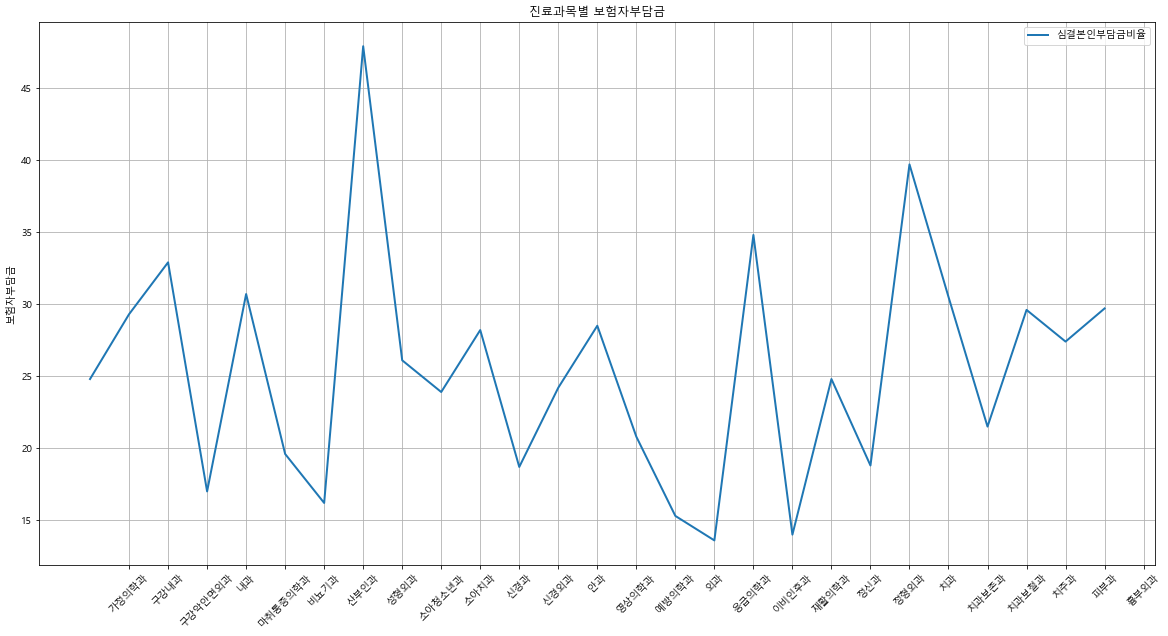

In [104]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=10)

# 데이터 넣기
ggdf.plot()

plt.title("진료과목별 보험자부담금")
plt.ylabel("보험자부담금")

# x축 범위?
a = list(range(1,30,1))
plt.xticks([i for i in range(1,28,1)], k, rotation = 45)

# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()